# Module 5 Final Project

Student name: **Cynthia Pedrasa**  
Student pace: **self paced**  
Scheduled project review date/time:  **Mon, Jun 15, 2020 10:00am - 11:00am (EDT)**  
Instructor name: **Jeff Herman**  
Blog post URL:  https://cpedrasa.github.io/exploratory_data_analysis

## Table of contents

Data Science Framework  

**Part I** Obtain Data, Scrub Data, Data Exploration

**Part II**

Evaluate Algorithms - Train Test Split ; Test Options ; Eval metrics
Improve with algorithm tuning- ml alg parameters grid search, random search   
Improve performance with ensemble, bagging, boosting
  
IV.   Evaluate Algorithms
  + A. <a href="#4a.-Train-Test-Split">Train Test Split</a> 
  + B. <a href="#4b.-Cross-Validation">Cross Validation</a>  
  + C. <a href="#4c.-Evaluation-Metric">Evaluation Metric</a>   

V.    Machine Learning Algorithms/Tuning/Improve Accuracy  
  +    <a href="#Logistic-Regression">Logistic Regression</a>
  +    <a href="#KNeighborsClassifier">KNeighborsClassifier</a>   
  +    <a href="#DecisionTreeClassifier">DecisionTreeClassifier</a>    
  
VI.   Ensembles
  +    <a href="#RandomForestClassifier">RandomForestClassifier</a>    
  +    <a href="#BaggingClassifier">BaggingClassifier</a>  
  +    <a href="#BalancedBaggingClassifier">BalancedBaggingClassifier</a> 
  +    <a href="#ADABoostClassifier">ADABoostClassifier</a>   
  +    <a href="#GradientBoostingClassifier">Gradient Boosting Classifier</a>
  +    <a href="#XGBoostClassifier">XGBoostClassifier</a>   
  +    <a href="#SVM-Classifier">SVM Classifier</a>
  +    <a href="#Finalize-Save-Model-for-Later-Use">Finalize Save Model for Later Use</a>  
  +    <a href="#Predictions">Predictions</a>    


VII.   <a href="#iNterpreting-the-Data">iNterpreting the Data</a>  

VIII.  <a href="#Future-Work">Future Work</a>  


In [1]:
#Import Libraries
import pandas as pd
from pandas import set_option
import pickle
import time
import numpy as np
from numpy import mean
from numpy import std
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt # plotting library for Python
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

import pyodbc
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

import warnings
warnings.filterwarnings('ignore')
import scipy as sp

from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score,  GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_predict 
from sklearn.utils.class_weight import compute_class_weight
from sklearn.datasets import make_classification
from collections import Counter

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedBaggingClassifier 
from imblearn.ensemble import BalancedRandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, roc_curve, auc
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier


Using TensorFlow backend.


In [3]:
###################################################################
# Let's import the pre-processed data from Part I of this project
###################################################################

#Load the data from the pickle file 
# with open('readmissions.pickle', "rb") as f:
#     df = pickle.load(f)

# or load the data set from the saved csv file
import pandas as pd
df = pd.read_csv('final_data.csv')
y = df.readmitted
X = df.drop(['readmitted'], axis = 1)

"""
Let us split train and test in a stratified fashion to ensure they have 
approx. the same % of samples of each target class as the complete set.
"""

# split into train/test sets with same class ratio 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)
train_0, train_1 = len(y_train[y_train==0]), len(y_train[y_train==1])
test_0, test_1 = len(y_test[y_test==0]), len(y_test[y_test==1])
print('Stratified Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))



Stratified Train: 0=44302, 1=4126, Test: 0=11075, 1=1032


In [4]:
#Create functions to load data, split, train & test data and time execution

def load_data(file_name):   
    import pandas as pd
    df = pd.read_csv(file_name)
    y = df.readmitted
    X = df.drop(['readmitted'], axis = 1)
    return X, y

def train_test_dist(X, y):
    train_0, train_1 = len(y_train[y_train==0]), len(y_train[y_train==1])
    test_0, test_1 = len(y_test[y_test==0]), len(y_test[y_test==1])
    print('Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))
    
def split_train_test(X, y):
    X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify = y )
    return X_train, X_test, y_train, y_test 

start = time.time()
def exec_time():
    execution_time = time.time() - start
    print('Execution time', time.strftime("%H:%M:%S", time.gmtime(execution_time)))

exec_time()

Execution time 00:00:00


[<a href="#Module-5-Final-Project">Jump back to Table of Contents</a>]  

## 3e.  Feature Selection

In [5]:
# def plot_feature_importances(model):
#     feature_names = X.columns
#     feature_imports = model.feature_importances_
#     most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(20, "Importance")
#     most_imp_features.sort_values(by="Importance", inplace=True)
#     plt.figure(figsize=(10,10))
#     plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
#     plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
#     plt.xlabel('Importance')
#     plt.title('Most important features ')
#     plt.show()

In [6]:
# # Feature Importance with Extra Trees Classifier
# start = time.time()
# # feature extraction
# ET = ExtraTreesClassifier()
# ET.fit(X, y)

# plot_feature_importances(ET)
# execution_time = time.time() - start
# print('Execution time', time.strftime("%H:%M:%S", time.gmtime(execution_time)))

In [7]:


# df = datafinal.copy(deep=True)
# selected_features = ['num_lab_procedures',
#  'num_medications',
#  'time_in_hospital',
#  'age',
#  'num_procedures',
#  'number_diagnoses',
#  'number_meds',
#  'gender_1',
#  'race_Caucasian',
#  'num_encounters_log',
#  'admission_source_id_7',
#  'A1Cresult_2',
#  'admission_type_id_3',
#  'ICDCat1_1',
#  'discharge_disposition_id_2',
#  'change_1',
#  'A1Cresult_1',
#  'number_changes',   
#  'ICDCat1_3',
#  'admission_type_id_5']
 
# X = df[selected_features]
# y = df['readmitted']

# #define X and y 
# X = df.drop(['readmitted'], axis = 1)
# y = df.readmitted

# test_size = 0.5

# seed = 2

# X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=2, stratify=y)

# #Stratified Kfold
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# print('Dataset: Class 0=%d, Class 1=%d' % (len(y[y==0]), len(y[y==1])))
# print('Train: Class 0=%d, Class 1=%d' % (len(y_train[y_train==0]), len(y_train[y_train==1]))) 
# print('Test: Class 0=%d, Class 1=%d' % (len(y_test[y_test==0]), len(y_test[y_test==1])))

# print('Relative frequencies of the class (train)')
# print(y_train.value_counts(normalize=True))
# print('Relative frequencies of the class (test)')
# print(y_test.value_counts(normalize=True))


[<a href="#Module-5-Final-Project">Jump back to Table of Contents</a>]  

# Evaluate Algorithms  


Before we start the evaluation of different models, let's define the different functions that we will use in model evaluation.

[<a href="#Module-5-Final-Project">Jump back to Table of Contents</a>]  

In [8]:
#Calculate prevalence
def calc_prevalence(y_test):
    return (sum(y_test)/len(y_test))


In [9]:
#Calculate specificity
def calc_specificity(y_test, predictions, thresh):
    # calculates specificity
    return sum((predictions < thresh) & (y_test == 0)) /sum(y_test ==0)

In [10]:
#Calculate and print scores        
def print_scores(y_test, y_pred):
    from sklearn.metrics import accuracy_score 
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import mean_squared_error  
    from sklearn.metrics import r2_score
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import auc
    from sklearn.metrics import classification_report
    from sklearn.metrics import roc_curve
    from sklearn.metrics import precision_score       
    print("Accuracy: {}".format((accuracy_score(y_test, y_pred).round(decimals=4)*100)),'%')
    print("Precision: {}".format(precision_score(y_test, y_pred)))
    print("Recall: {}".format(recall_score(y_test, y_pred)))
    print("F1-score: {}".format(f1_score(y_test, y_pred)))
    print("R2: {}".format(r2_score(y_test, y_pred)))
    print("MSE: {}".format(mean_squared_error(y_test, y_pred)))
    print("Prevalence: {}".format(calc_prevalence(y_pred)))
    print("Specificity: {}".format(calc_specificity(y_test, y_pred, 0.5)))
    print('---------------------------------------------------------------------')
    print('\n','Classification Report:')
    print(classification_report(y_test, y_pred, target_names = ['NO', 'YES']))
    print('---------------------------------------------------------------------')
    # Confusion matrix plot   
    from sklearn.metrics import confusion_matrix
    conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
    print('Confusion matrix:\n', conf_mat)
    labels = ['Class 0', 'Class 1']
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('Expected')
    plt.show()


In [11]:
#plot ROC curve
def plot_roc_curve(y_test, model_probs, lblname):
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import auc
    from sklearn.metrics import f1_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import precision_score
    auc = roc_auc_score(y_test, model_probs) 
    fpr, tpr, _ = roc_curve(y_test, model_probs)
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label = 'ROC AUC: %.3f' % roc_auc_score(y_test, model_probs).round(decimals=3))
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', alpha=.8)
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xticks(np.arange(0,1.1,0.1))
    plt.yticks(np.arange(0,1.1,0.1))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show();
   

In [12]:
 
# plot the Precision-Recall Curve
def plot_pr_curve(y_test, y_pred, model_probs, lblname):
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import auc
    from sklearn.metrics import f1_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import precision_score
    precision, recall, _ = precision_recall_curve(y_test, model_probs)
    f1, pr_auc = f1_score(y_test, y_pred), auc(recall, precision)
    print('f1=%.3f PR AUC=%.3f' % (f1, pr_auc))
    # calculate the no skill line as the proportion of the positive class
    no_skill = len(y[y==1]) / len(y)
    # plot the no skill precision-recall curve
    plt.plot([0, 1], [no_skill, no_skill],color='red', linestyle='--', label='Random') 
    precision, recall, _ = precision_recall_curve(y_test, model_probs)
    plt.plot(recall, precision, marker='.', label=  'PR AUC: %.3f' % auc(recall, precision).round(decimals=3))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall curve')
      # show the legend
    plt.legend()
      # show the plot
    plt.show()
 

In [25]:
#Calculate scores at 25% threshold
def print_scores_thresh(y_test, y_pred):
    print('---------------------------------------------------------------------')
    print('scores with threshold = 0.25')
    print('Accuracy: %.3f'%(accuracy_score(y_test, (LR_probs >= 0.25).astype('int'))))
    print('Recall: %.3f'%(recall_score(y_test, (LR_probs >= 0.25).astype('int'))))
    print('Precision: %.3f'%(precision_score(y_test, (LR_probs >= 0.25).astype('int'))))
    print('F1-score: %.3f'%(f1_score(y_test, (LR_probs >= 0.25).astype('int'))))
    print('AUC: %.3f'%(roc_auc_score(y_test, (LR_probs >= 0.25).astype('int'))))
    print("Prevalence: {}".format(calc_prevalence(LR_probs >= 0.25).astype('int')))
    print("Specificity: {}".format(calc_specificity(y_test, y_pred, 0.25)))
    print('---------------------------------------------------------------------')
    print(classification_report(y_test, (LR_probs >= 0.25).astype('int'), target_names = ['NO', 'YES']))
    display(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))
    print('')
def print_mean_rocauc_scores(scores):
    from numpy import mean
    print('Mean ROC AUC: %.3f' % mean(scores))

[<a href="#Module-5-Final-Project">Jump back to Table of Contents</a>]  

Classification is used to predict which category something will fall into. We are trying to figure out whether the hospitalized patient with diabetes is likely to be readmitted in 30 days or not readmitted.  

# Logistic Regression

Mean ROC AUC: 0.594
Accuracy: 65.8 %
Precision: 0.12318137730358875
Recall: 0.49224806201550386
F1-score: 0.19705197827773466
R2: -3.3854428053966084
MSE: 0.3419509374741885
Prevalence: 0.34062938795738
Specificity: 0.6734988713318284
---------------------------------------------------------------------

 Classification Report:
              precision    recall  f1-score   support

          NO       0.93      0.67      0.78     11075
         YES       0.12      0.49      0.20      1032

    accuracy                           0.66     12107
   macro avg       0.53      0.58      0.49     12107
weighted avg       0.87      0.66      0.73     12107

---------------------------------------------------------------------
Confusion matrix:
 [[7459 3616]
 [ 524  508]]


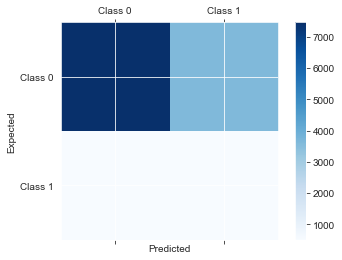

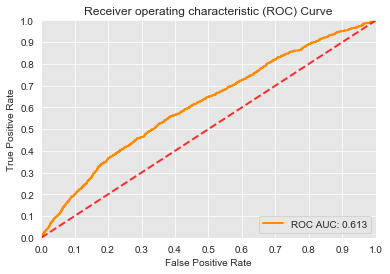

f1=0.197 PR AUC=0.128


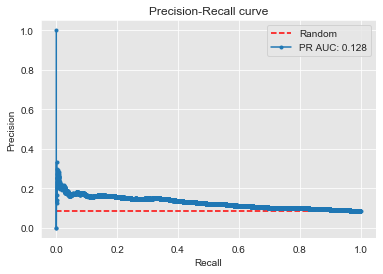

Execution time 00:00:08


In [28]:

start = time.time()

X, y = load_data('final_data.csv')                                    # load data
X_train, X_test, y_train, y_test  = split_train_test(X, y)            # split data

LR = LogisticRegression(solver='lbfgs')

#Evaluate the model using accuracy scoring
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(LR,  X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
print_mean_rocauc_scores(scores)
#########################################################
# Use SMOTE to increase recall especially for predicting 
# the minority class ...but may come at the cost of precision
#########################################################
sm = SMOTE(random_state=2, ratio=1.0)                                 # Define sampling
X_train, y_train = sm.fit_sample(X_train, y_train)

model = LR.fit(X_train, y_train)      # define/fit model

LR_probs= model.predict_proba(X_test)[:, 1]              # predict probabilities for the positive outcome only
y_pred = model.predict(X_test)                           # predict

fpr_LR, tpr_LR, thresholds = roc_curve(y_test, LR_probs)              #calculate roc_auc score
LR_precision, LR_recall, _ = precision_recall_curve(y_test, LR_probs) #calculate pr_auc score

#Summary report:
print_scores(y_test, y_pred)
plot_roc_curve(y_test, LR_probs,  'LR')
plot_pr_curve(y_test, y_pred, LR_probs, 'LR')   
    
exec_time()



[<a href="#Module-5-Final-Project">Jump back to Table of Contents</a>]  

## Logistic Regression Model Tuning

In [29]:
## ⏰ This cell may take a long time to run!
# grid search class weights with logistic regression for imbalance classification
start = time.time()

X, y = load_data('final_data.csv')                                    # load data
X_train, X_test, y_train, y_test  = split_train_test(X, y)            # split data

# define model
lr = LogisticRegression()

# define grid
C_param_range = [0.001, 0.01, 0.1, 1, 10, 100]
balance = [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}] 

param_grid = dict(class_weight=balance, C=C_param_range)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(lr, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
print_mean_rocauc_scores(scores)

# define grid search
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv=cv, n_jobs=-1, scoring='roc_auc')
# execute the grid search

sm = SMOTE(random_state=2, ratio=1.0)                                 # Define sampling
X_train, y_train = sm.fit_sample(X_train, y_train)

grid_result = grid.fit(X_train, y_train)
               
# print results
print("Best AUC score: %f using  %s" % (grid_result.best_score_, grid_result.best_params_))

# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, stdev, param))
    
execution_time = time.time() - start
print('Execution time', time.strftime("%H:%M:%S", time.gmtime(execution_time)))

#Best AUC score: 0.651474 using  {'C': 100, 'class_weight': {0: 1, 1: 1}}

Mean ROC AUC: 0.621
Best AUC score: 0.651474 using  {'C': 100, 'class_weight': {0: 1, 1: 1}}
0.564967 (0.010093) with: {'C': 0.001, 'class_weight': {0: 100, 1: 1}}
0.614973 (0.005141) with: {'C': 0.001, 'class_weight': {0: 10, 1: 1}}
0.646720 (0.005426) with: {'C': 0.001, 'class_weight': {0: 1, 1: 1}}
0.640935 (0.005525) with: {'C': 0.001, 'class_weight': {0: 1, 1: 10}}
0.617996 (0.006787) with: {'C': 0.001, 'class_weight': {0: 1, 1: 100}}
0.635965 (0.013128) with: {'C': 0.01, 'class_weight': {0: 100, 1: 1}}
0.650142 (0.005134) with: {'C': 0.01, 'class_weight': {0: 10, 1: 1}}
0.650993 (0.005254) with: {'C': 0.01, 'class_weight': {0: 1, 1: 1}}
0.648273 (0.005319) with: {'C': 0.01, 'class_weight': {0: 1, 1: 10}}
0.623215 (0.008319) with: {'C': 0.01, 'class_weight': {0: 1, 1: 100}}
0.636203 (0.017304) with: {'C': 0.1, 'class_weight': {0: 100, 1: 1}}
0.648567 (0.005009) with: {'C': 0.1, 'class_weight': {0: 10, 1: 1}}
0.651278 (0.005322) with: {'C': 0.1, 'class_weight': {0: 1, 1: 1}}
0.6487

Mean ROC AUC: 0.621
Accuracy: 65.69 %
Precision: 0.12619731800766285
Recall: 0.5106589147286822
F1-score: 0.20238095238095238
R2: -3.400272805221621
MSE: 0.3431072933013959
Prevalence: 0.3449244238870075
Specificity: 0.6705191873589165
---------------------------------------------------------------------

 Classification Report:
              precision    recall  f1-score   support

          NO       0.94      0.67      0.78     11075
         YES       0.13      0.51      0.20      1032

    accuracy                           0.66     12107
   macro avg       0.53      0.59      0.49     12107
weighted avg       0.87      0.66      0.73     12107

---------------------------------------------------------------------
Confusion matrix:
 [[7426 3649]
 [ 505  527]]


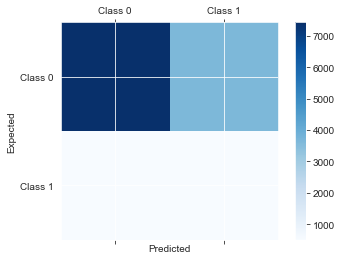

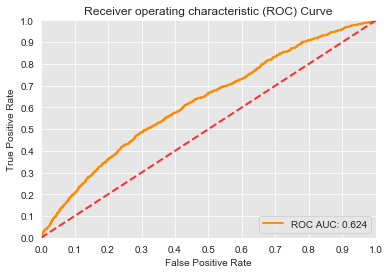

f1=0.202 PR AUC=0.138


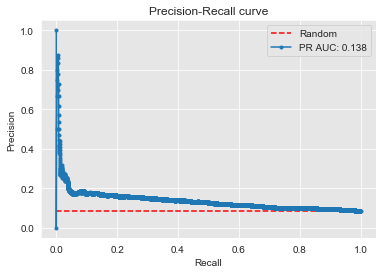

Execution time 00:00:03


In [32]:
    
#Let's run the model again with the hypertuned parameters and scaled data
start = time.time()

X, y = load_data('final_data.csv')                                    # load data

X_train, X_test, y_train, y_test  = split_train_test(X, y)            # split data

LR_tuned = Pipeline(steps=[('t', StandardScaler())                        # Model w/ Tuned params
                           ,('m',LogisticRegression(C=100
                           , class_weight={0: 1, 1: 1}
                           , solver='lbfgs'))])                         

# evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(LR_tuned, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
print_mean_rocauc_scores(scores)

sm = SMOTE(random_state=2, ratio=1.0)                               # Define Oversampling
X_train, y_train = sm.fit_sample(X_train, y_train)                  # fit on SMOTE on train data

LR_tuned.fit(X_train, y_train)                                #fit the model
LRt_probs= LR_tuned.predict_proba(X_test)[:,1]                # predict probabilities for the positive outcome only

y_pred = LR_tuned.predict(X_test) # predict 
fpr_LRt, tpr_LRt, thresholds = roc_curve(y_test, LRt_probs)               #calculate roc_auc score
LRt_precision, LRt_recall, _ = precision_recall_curve(y_test, LRt_probs)  #calculate pr_auc score

#Summarize:
print_scores(y_test, y_pred)
plot_roc_curve(y_test, LRt_probs,  'LR')
plot_pr_curve(y_test, y_pred, LRt_probs, 'LR')   
 
exec_time()


**Tuning result:**  As seen from the above, the ROC AUC score improved from ROC AUC 0.623 to ROC AUC 0.626 with the hypertuned parameters. 
However, the score is not good enough so let's evaluate other models.  
Logistic ROC AUC 0.623  
Logistic PR AUC: 0.132  
Tuned:    
Logistic ROC AUC 0.626  
Logistic PR AUC: 0.130  

[<a href="#Module-5-Final-Project">Jump back to Table of Contents</a>]  

# KNeighborsClassifier

In [ ]:
start = time.time()

X, y = load_data('final_data.csv')                                            # load data
X_train, X_test, y_train, y_test  = split_train_test(X, y)                    # split data

KNN = Pipeline(steps=[('t', StandardScaler())
                      ,('m', KNeighborsClassifier ())]).fit(X_train, y_train) # define/fit model

KNN_probs = KNN.predict_proba(X_test)[:, 1]             # predict probabilities for the positive 
y_pred = KNN.predict(X_test)                                                  # predict 

fpr_KNN, tpr_KNN, thresholds = roc_curve(y_test, KNN_probs)                   #calculate roc_auc score
KNN_precision, KNN_recall, _ = precision_recall_curve(y_test, KNN_probs)      #calculate pr_auc score

#Summarize:
print_scores(y_test, y_pred)
plot_roc_curve(y_test, KNN_probs,  'KNN')
plot_pr_curve(y_test, y_pred, KNN_probs, 'KNN') 

exec_time()

[<a href="#Module-5-Final-Project">Jump back to Table of Contents</a>]  

# KNN Tuning Parameters

In [ ]:
## ⏰ This cell may take about a minute to run!

start = time.time()
#Improve model performance - find the optimal number of neighbors to use for the classifier. 
#To do this, complete the find_best_k() function below to iterate over multiple values of K and 
#find the value of K that returns the best overall performance
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))
find_best_k(X_train, y_train, X_test, y_test)

exec_time()

[<a href="#Module-5-Final-Project">Jump back to Table of Contents</a>]  

## KNN Tuned Model

In [ ]:
#Run the improved model with best_k=1
start = time.time()

X, y = load_data('final_data.csv')                                         # load data
X_train, X_test, y_train, y_test  = split_train_test(X, y)                 # split data

KNT = Pipeline(steps=[('t', StandardScaler())
                      ,('m', KNeighborsClassifier(n_neighbors=1))]).fit(X_train, y_train) # define/fit model

KNT_probs = KNT.predict_proba(X_test)[:, 1]                                # predict probabilities for the positive 
y_pred = KNT.predict(X_test)                                               # predict 

fpr_KNN, tpr_KNT, thresholds = roc_curve(y_test, KNT_probs)                #calculate roc_auc score
KNT_precision, KNT_recall, _ = precision_recall_curve(y_test, KNT_probs)   #calculate pr_auc score

#Summarize:
print_scores(y_test, y_pred)
plot_roc_curve(y_test, KNT_probs,  'KNT')
plot_pr_curve(y_test, y_pred, KNT_probs, 'KNT') 

exec_time()



**Tuning result:**  Tuned KNN Precision Recall is PR AUC: 0.139 which has slightly improved from AUC: 0.098

[<a href="#Module-5-Final-Project">Jump back to Table of Contents</a>]  

# DecisionTreeClassifier
 area under the precision-recall metric. The problem is the shape of the AUPRC 
For DecisionTreeClassifier, replace predict with pred_proba; the latter serves the same role as decision_function.

In [ ]:
start = time.time()

X, y = load_data('final_data.csv')                                    # load data
X_train, X_test, y_train, y_test  = split_train_test(X, y)            # split data

DT = DecisionTreeClassifier().fit(X_train, y_train)           # define/fit model

# predict probabilities
DT_probs = DT.predict_proba(X_test)[:, 1]                        # predict probabilities for the positive outcome only
y_pred = DT.predict(X_test)                                      # predict

fpr_DT, tpr_DT, thresholds = roc_curve(y_test, DT_probs)              #calculate roc_auc score
DT_precision, DT_recall, _ = precision_recall_curve(y_test, DT_probs) #calculate pr_auc score

#Summarize:
print_scores(y_test, y_pred)
plot_roc_curve(y_test, DT_probs,  'DT')
plot_pr_curve(y_test, y_pred, DT_probs, 'DT') 

exec_time()



[<a href="#Module-5-Final-Project">Jump back to Table of Contents</a>]  

## Decision Tree Tuning Parameters

In [ ]:
## ⏰ This cell may take a long time to run!
# Tune Decision Tree
# Instantiate DecisionTreeClassifier

start = time.time()
#define model
DT = DecisionTreeClassifier(criterion='entropy')

# define grid
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6],
    'max_features' : [10,15, 20, 22, 24, 25, 28, 30,35, 30, 35, 40, 45]
}

# evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Instantiate GridSearchCV
dt_grid_search = GridSearchCV(estimator=DT, param_grid=dt_param_grid, cv=cv,  n_jobs=-1, scoring='roc_auc')

# execute the grid search
dt_grid_search.fit(X_train, y_train)


print("Best Parameter Combination Found During Grid Search:")
print(dt_grid_search.best_params_)


# report all configurations
means = dt_grid_search.cv_results_['mean_test_score']
stds = dt_grid_search.cv_results_['std_test_score']
params = dt_grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, stdev, param))

exec_time()

"""
Best Parameter Combination Found During Grid Search:
{'criterion': 'entropy', 'max_depth': 5, 'max_features': 35, 'min_samples_leaf': 2, 'min_samples_split': 2}
Execution time 00:23:04
"""

[<a href="#Module-5-Final-Project">Jump back to Table of Contents</a>]  

## Decision Tree Tuned Model

In [ ]:
#Run Tuned Model with Best Parameter Combination Found During Grid Search:

start = time.time()

X, y = load_data('final_data.csv')                                              # load data
X_train, X_test, y_train, y_test  = split_train_test(X, y)                      # split data

# sm = SMOTE(random_state=27, ratio=1.0)                                        # SMOTE
# X_train, y_train = sm.fit_sample(X_train, y_train)

DTT = DecisionTreeClassifier(criterion='entropy'
                             , max_depth= 5
                             , min_samples_leaf= 2
                             , min_samples_split= 2).fit(X_train, y_train)  

DTT_probs= DTT.predict_proba(X_test)[:, 1]             # predict probabilities for the positive outcome only

y_pred = DTT.predict(X_test)                                                    # predict
fpr_DTT, tpr_DTT, thresholds = roc_curve(y_test, DTT_probs)                     #calculate roc_auc score
DTT_precision, DTT_recall, _ = precision_recall_curve(y_test, DTT_probs)        #calculate pr_auc score

#Summarize:
print_scores(y_test, y_pred)
plot_roc_curve(y_test, DTT_probs,  'DTT')
plot_pr_curve(y_test, y_pred, DTT_probs, 'DTT') 

exec_time()



**Tuning Results:** 
Pre-tuned  DT Scores:  
DTT ROC AUC 0.516  
DTT PR AUC: 0.155  
Tuned DT Scores:  
DTT ROC AUC 0.608  
DTT PR AUC: 0.128 

**Tuning result:** While accuracy slightly decreased, we slightly improved the AUC, Precision score, Recall, F1- score with some tuning and decreased prediction errors (MAE & MSE)


Mean Absolute Error (MAE): MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. It’s the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight.  
Root mean squared error (RMSE): RMSE is a quadratic scoring rule that also measures the average magnitude of the error. It’s the square root of the average of squared differences between prediction and actual observation.  
Both MAE and RMSE express average model prediction error in units of the variable of interest. Both metrics can range from 0 to ∞ and are indifferent to the direction of errors. They are negatively-oriented scores, which means lower values are better.

[<a href="#Module-5-Final-Project">Jump back to Table of Contents</a>]  

# RandomForestClassifier

In [ ]:
start = time.time()

X, y = load_data('final_data.csv')                                    # load data
X_train, X_test, y_train, y_test  = split_train_test(X, y)            # split data
sm = SMOTE(random_state=27, ratio=1.0)                                        # SMOTE
X_train, y_train = sm.fit_sample(X_train, y_train)
RF = RandomForestClassifier(n_estimators=10, class_weight='balanced').fit(X_train, y_train)  # define/fit model
 # define/fit model

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)


#Evaluate the model using roc_auc scoring
scores = cross_val_score(RF, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)


RF_probs= RF.predict_proba(X_test)[:, 1]                   # predict probabilities for the positive outcome only

y_pred = RF.predict(X_test)
fpr_RF, tpr_RF, thresholds = roc_curve(y_test, RF_probs) 
RF_precision, RF_recall, _ = precision_recall_curve(y_test, RF_probs) 

#Summarize:
print_scores(y_test, y_pred)
plot_roc_curve(y_test, RF_probs,  'RF')
plot_pr_curve(y_test, y_pred, RF_probs, 'RF') 

exec_time()


[<a href="#Module-5-Final-Project">Jump back to Table of Contents</a>]  

## Random Forest Tuning Parameters

In [ ]:
## ⏰ This cell may take a long time to run!
# grid search class weights with RandomForestClassifier for imbalance classification
start = time.time()

X, y = load_data('final_data.csv')                                    # load data
X_train, X_test, y_train, y_test  = split_train_test(X, y)            # split data

RF = RandomForestClassifier(criterion='entropy')                      # define model

# define grid
rf_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
}

# evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define grid search
rf_grid = GridSearchCV(estimator=RF, param_grid=rf_param_grid, cv=cv, n_jobs=-1, scoring='roc_auc')
# execute the grid search
rf_grid_result = rf_grid.fit(X_train, y_train)
               
# print results
print("Best AUC score: %f using  %s" % (rf_grid_result.best_score_, rf_grid_result.best_params_))

# report all configurations
means = rf_grid_result.cv_results_['mean_test_score']
stds = rf_grid_result.cv_results_['std_test_score']
params = rf_grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, stdev, param))
    
exec_time()



[<a href="#Module-5-Final-Project">Jump back to Table of Contents</a>]  

# RandomForestClassifier Tuned Model

In [ ]:
## ⏰ This cell may take a long time to run!
#Run tuned model with Class weighting and Optimal Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 30}
start = time.time()

X, y = load_data('final_data.csv')                                    # load data
X_train, X_test, y_train, y_test  = split_train_test(X, y)            # split data

# define model
RFT = RandomForestClassifier(criterion='gini'                         # define/fit model
                             ,n_jobs = -1
                             ,min_samples_leaf = 3
                             ,n_estimators= 30
                             ,min_samples_split=5
                             ,class_weight='balanced').fit(X_train, y_train)

# # define evaluation procedure
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# #Evaluate the model using roc_auc scoring
# scores = cross_val_score(RFT, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
# print_mean_rocauc_scores(scores)

# predict probabilities
RFT_probs = RFT.predict_proba(X_test)[:, 1]              # predict probabilities for the positive outcome only
y_pred = RFT.predict(X_test)                             # predict

fpr_RFT, tpr_RFT, thresholds = roc_curve(y_test, RFT_probs)              #calculate roc_auc score
RFT_precision, RFT_recall, _ = precision_recall_curve(y_test, RFT_probs) #calculate pr_auc score

#Summarize:
print_scores(y_test, y_pred)
plot_roc_curve(y_test, RFT_probs,  'RFT')
plot_pr_curve(y_test, y_pred, RFT_probs, 'RFT') 

exec_time()



**Tuning result:**  We see an improved RF AUC with some tuning of the model:  
From ROC AUC 0.552  to ROC AUC 0.620 
From PR  AUC  0.107 to PR  AUC 0.129  
Like the previous models, we have a problem of high training score but low test score (over-fitting), our model is not generalizing properly. 
+ Apply Sub-sample the positive samples in order to have a 50/50 dataset.
+ Use other algorithm that deals naturally with unbalanced datasets, like anomaly detection methods.

[<a href="#Module-5-Final-Project">Jump back to Table of Contents</a>]  

In [ ]:
#Random Forest Feature Selection - Important Features 
feature_names = X_train.columns
feature_imports = RFT.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"])
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,18))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest')
plt.show()

[<a href="#Module-5-Final-Project">Jump back to Table of Contents</a>]  

# BaggingClassifier

In [ ]:
# Bagged Decision Trees for Classification
start = time.time()

X, y = load_data('final_data.csv')                                    # load data
X_train, X_test, y_train, y_test  = split_train_test(X, y)            # split data

cart = DecisionTreeClassifier()                                       # define/fit model
num_trees = 100
BG = BaggingClassifier(base_estimator=cart, n_estimators=num_trees
                       , random_state=2).fit(X_train, y_train)   


BG_probs= BG.predict_proba(X_test)[:, 1]                  # predict probabilities for the positive outcome only

y_pred = BG.predict(X_test)                                           # predict 
fpr_BG, tpr_BG, thresholds = roc_curve(y_test, BG_probs)              #calculate roc_auc score
BG_precision, BG_recall, _ = precision_recall_curve(y_test, BG_probs) #calculate pr_auc score

#Summarize:
print_scores(y_test, y_pred)
plot_roc_curve(y_test, BG_probs,  'BG')
plot_pr_curve(y_test, y_pred, BG_probs, 'BG') 

exec_time()


[<a href="#Module-5-Final-Project">Jump back to Table of Contents</a>]  

# BalancedBaggingClassifier

In [ ]:
## ⏰ This cell may take a long time to run!
# BalancedBaggingClassifier for Classification - random undersampling strategy on the majority class within a bootstrap sample in order to balance the two classes
start = time.time()

X, y = load_data('final_data.csv')                                        # load data
X_train, X_test, y_train, y_test  = split_train_test(X, y)                # split data

cart = DecisionTreeClassifier(criterion='entropy'                         # define/fit model      
                              , max_depth= 5
                              , min_samples_leaf= 2
                              , min_samples_split= 2)
num_trees = 100
#BBG = BalancedBaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=2).fit(X_train, y_train) 

BBG = Pipeline(steps=[('t', StandardScaler()),('m',BalancedBaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=2).fit(X_train, y_train))])
BBG.fit(X_train, y_train) 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(BBG, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
BBG_probs = BBG.predict_proba(X_test)[:, 1]               # predict probabilities for the positive outcome only

y_pred = BBG.predict(X_test)                              # predict
fpr_BBG, tpr_BBG, thresholds = roc_curve(y_test, BBG_probs)              #calculate roc_auc score
BBG_precision, BBG_recall, _ = precision_recall_curve(y_test, BBG_probs) #calculate pr_auc score

#Summarize:
print_scores(y_test, y_pred)
plot_roc_curve(y_test, BBG_probs,  'BBG')
plot_pr_curve(y_test, y_pred, BBG_probs, 'BBG') 

exec_time()


[<a href="#Module-5-Final-Project">Jump back to Table of Contents</a>]  

# Gradient Boosting
Another way that we can improve the performance of algorithms on this problem is by using ensemble methods. In this section we will evaluate four different ensemble machine learning algorithms, two boosting and two bagging methods:
􏰀 Boosting Methods: AdaBoost (AB) and Gradient Boosting (GBM). 􏰀 Bagging Methods: Random Forests (RF) and Extra Trees (ET).
We will use the same test harness as before, 10-fold cross validation. No data standardization is used in this case because all four ensemble algorithms are based on decision trees that are less sensitive to data distributions.


Finalize Model (use all training data and confirm using validation dataset).  We can see that we achieve an accuracy of nearly 86% on the held-out validation dataset. A score that matches closely to our expectations estimated above during the tuning of SVM


[<a href="#Module-5-Final-Project">Jump back to Table of Contents</a>]  

# ADABoostClassifier


In [ ]:
start = time.time()

X, y = load_data('final_data.csv')                                    # load data
X_train, X_test, y_train, y_test  = split_train_test(X, y)            # split data

AB = AdaBoostClassifier(n_estimators=50, learning_rate=1).fit(X_train, y_train)      # define/fit model

# predict probabilities
AB_probs = AB.predict_proba(X_test)[:, 1]              # predict probabilities for the positive outcome only

y_pred = AB.predict(X_test)                                           # predict
fpr_AB, tpr_AB, thresholds = roc_curve(y_test, AB_probs)              #calculate roc_auc score
AB_precision, AB_recall, _ = precision_recall_curve(y_test, AB_probs) #calculate pr_auc score 

#Summarize:
print_scores(y_test, y_pred)
plot_roc_curve(y_test, AB_probs,  'AB')
plot_pr_curve(y_test, y_pred, AB_probs, 'AB') 

exec_time()


**Result** Train & Test has around the same score. No evidence of overfitting. Let us see if we can improve the auc further by tuning the model 

[<a href="#Module-5-Final-Project">Jump back to Table of Contents</a>]  

# ADABoostClassifier Tuned Model


We can see the AdaBoost ensemble with a logistic regression weak model achieves a classification accuracy of about 91.5 percent on this test dataset.  Using Different Base Learners
I have used SVC as a base estimator. You can use any ML learner as base estimator if it accepts sample weight such as Decision Tree, Support Vector Classifier.

The results show that, given the selected grid search ranges, the optimal parameters (those that provide the best cross-validation fit for the data) are 230 estimators with a learning rate of 0.05. The plot of the model of these parameters indeed shows that the fit looks might fine.  
Pros
AdaBoost is easy to implement. It iteratively corrects the mistakes of the weak classifier and improves accuracy by combining weak learners. You can use many base classifiers with AdaBoost. AdaBoost is not prone to overfitting. This can be found out via experiment results, but there is no concrete reason available.

Cons
AdaBoost is sensitive to noise data. It is highly affected by outliers because it tries to fit each point perfectly. AdaBoost is slower compared to XGBoost.  

In [ ]:
start = time.time()

X, y = load_data('final_data.csv')                                     # load data
X_train, X_test, y_train, y_test  = split_train_test(X, y)             # split data

ABT = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1)     # define/fit model
                         , n_estimators=40, learning_rate=1.0).fit(X_train, y_train) 

ABT_probs = ABT.predict_proba(X_test)[:, 1]              # predict probabilities for the positive outcome only

y_pred = ABT.predict(X_test)                                            # predict
fpr_ABT, tpr_ABT, thresholds = roc_curve(y_test, ABT_probs)              #calculate roc_auc score
ABT_precision, ABT_recall, _ = precision_recall_curve(y_test, ABT_probs) #calculate roc_auc score

#Summarize:
print_scores(y_test, y_pred)
plot_roc_curve(y_test, ABT_probs,  'ABT')
plot_pr_curve(y_test, y_pred, ABT_probs, 'ABT') 

exec_time()


[<a href="#Module-5-Final-Project">Jump back to Table of Contents</a>]  

**Tuning Result:**  
AB ROC AUC 0.623
AB PR AUC: 0.132
Tuned ADABoost Classifier:  
ABT ROC AUC 0.624
ABT PR AUC: 0.134

[<a href="#Module-5-Final-Project">Jump back to Table of Contents</a>]  

# GradientBoostingClassifier

In [ ]:

start = time.time()

X, y = load_data('final_data.csv')                                    # load data
X_train, X_test, y_train, y_test  = split_train_test(X, y)            # split data

GB = GradientBoostingClassifier().fit(X_train, y_train)               # define/fit model

GB_probs= GB.predict_proba(X_test)[:, 1]              # predict probabilities for the positive outcome only

y_pred = GB.predict(X_test)                                           # predict
fpr_GB, tpr_GB, thresholds = roc_curve(y_test, GB_probs)              #calculate roc_auc score
GB_precision, GB_recall, _ = precision_recall_curve(y_test, GB_probs) #calculate roc_auc score 

#Summarize:
print_scores(y_test, y_pred)
plot_roc_curve(y_test, GB_probs,  'GB')
plot_pr_curve(y_test, y_pred, GB_probs, 'GB') 

exec_time()



In [ ]:
# def display_acc_and_f1_score(true, preds, model_name):
#     acc = accuracy_score(true, preds)
#     f1 = f1_score(true, preds)
#     print("Model: {}".format(model_name))
#     print("Accuracy: {}".format(acc))
#     print("F1-Score: {}".format(f1))
    
# print("Training Metrics")
# display_acc_and_f1_score(y_train, AB_train_preds, model_name='AdaBoost')
# print("")
# display_acc_and_f1_score(y_train, GB_train_preds, model_name='Gradient Boosted Trees')
# print("")
# print("Testing Metrics")
# display_acc_and_f1_score(y_test, AB_test_preds, model_name='AdaBoost')
# print("")
# display_acc_and_f1_score(y_test, GB_test_preds, model_name='Gradient Boosted Trees')

[<a href="#Module-5-Final-Project">Jump back to Table of Contents</a>]  

# XGBoostClassifier

In [ ]:
start = time.time()

X, y = load_data('final_data.csv')                                      # load data
X_train, X_test, y_train, y_test  = split_train_test(X, y)              # split data

XGB = XGBClassifier().fit(X_train, y_train)                              # define/fit model

XGB_probs = XGB.predict_proba(X_test)[:, 1]              # predict probabilities for the positive outcome only
y_pred = XGB.predict(X_test)                                             # predict

fpr_XGB, tpr_XGB, thresholds = roc_curve(y_test, XGB_probs)              # calculate roc_auc score
XGB_precision, XGB_recall, _ = precision_recall_curve(y_test, XGB_probs) # calculate pr_auc score 

#Summary report:
print_scores(y_test, y_pred)
plot_roc_curve(y_test, XGB_probs,  'XGB')
plot_pr_curve(y_test, y_pred, XGB_probs, 'XGB')   
    
exec_time()


[<a href="#Module-5-Final-Project">Jump back to Table of Contents</a>]  


## Tuning XGBoost

In [ ]:
# ⏰ This cell may take a long time to run!
start = time.time()

param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

grid_XGBt = GridSearchCV(XGB, param_grid, scoring='roc_auc', cv=cv, n_jobs=1)
grid_XGBt.fit(X_train, y_train)

best_XBG_params = grid_XGBt.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_XBG_params.keys()):
    print('%s: %r' % (param_name, best_XBG_params[param_name]))

XGBt_train_preds = grid_XGBt.predict(X_train)
XGBt_test_preds = grid_XGBt.predict(X_test)
training_accuracy = accuracy_score(y_train, XGBt_train_preds)
test_accuracy = accuracy_score(y_test, XGBt_test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))
print('')
print_scores(y_test, XGBt_test_preds)
fpr_XGBt, tpr_XGBt, thresholds = roc_curve(y_test, XGBt_test_preds)

exec_time()



[<a href="#Module-5-Final-Project">Jump back to Table of Contents</a>]  


## Tuned XGBoost

In [ ]:
#Run Tuned XGBOsst model with grid search best parameters
start = time.time()

X, y = load_data('final_data.csv')                                           # load data
X_train, X_test, y_train, y_test  = split_train_test(X, y)                   # split data

XGBT = XGBClassifier(learning_rate= 0.1, max_depth= 6, min_child_weight= 2   # define/fit model
                     ,n_estimators= 100, subsample= 0.7).fit(X_train, y_train)

XGBT_probs = XGBT.predict_proba(X_test)[:, 1]              # predict probabilities for the positive outcome only
y_pred = XGBT.predict(X_test)                                               # predict

fpr_XGBT, tpr_XGBT, thresholds = roc_curve(y_test, XGBT_probs)              # calculate roc_auc score
XGBT_precision, XGBT_recall, _ = precision_recall_curve(y_test, XGBT_probs) # calculate pr_auc score

#Summary report:
print_scores(y_test, y_pred)
plot_roc_curve(y_test, XGBT_probs,  'XGBT')
plot_pr_curve(y_test, y_pred, XGBT_probs, 'XGBT') 

exec_time()


[<a href="#Module-5-Final-Project">Jump back to Table of Contents</a>]  

# SVM Classifier  

In [ ]:
## ⏰ This cell may take a VERY long time to run!

start = time.time()

X, y = load_data('final_data.csv')                                       # load data
X_train, X_test, y_train, y_test  = split_train_test(X, y)               # split data

SVC_cl = SVC(gamma='scale' ,probability =True                            # define/fit model
                           ,class_weight= {0: 1, 1: 10}).fit(X_train, y_train)

SVC_probs= SVC_cl.predict_proba(X_test)[:, 1]              # predict probabilities for the positive outcome only
y_pred = SVC_cl.predict(X_test)                            # predict

fpr_SVC, tpr_SVC, thresholds = roc_curve(y_test, SVC_probs)              # calculate roc auc
SVC_precision, SVC_recall, _ = precision_recall_curve(y_test, SVC_probs) # calculate pr auc

#Summary report:
print_scores(y_test, y_pred)
plot_roc_curve(y_test, SVC_probs,  'SVC_cl')
plot_pr_curve(y_test, y_pred, SVC_probs, 'SVC_cl') 

exec_time()

# Tuning SVC

In [ ]:
# ⏰ This cell may take a long time to run!
start = time.time()
X, y = load_data('final_data.csv')  
# grid search class weights with svm for imbalance classification

# define model
model = SVC(gamma='scale')
# define grid
balance = [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}] 
param_grid = dict(class_weight=balance)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search for SVM
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
# execute the grid search
grid_result = grid.fit(X, y)
# report the best configuration
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_)) # report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, stdev, param))

exec_time()

"""
RESULT:
Best: 0.618217 using {'class_weight': {0: 1, 1: 10}}
Execution time 03:12:28
"""



[<a href="#Module-5-Final-Project">Jump back to Table of Contents</a>]  

# Compare ROC Curves   

In [ ]:
start = time.time()

#compare the ROC curve between different models
plt.figure(figsize=(10,8))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

print('AUC Logistic regression: {}'.format(auc(fpr_LR, tpr_LR,)))
print('AUC Tuned Logistic regression: {}'.format(auc(fpr_LRt, tpr_LRt,))) 
# print('AUC KNearestNeighbors: {}'.format(auc(fpr_KNN, tpr_KNN,)))
# print('AUC KNearestNeighbors: {}'.format(auc(fpr_KNT, tpr_KNT,)))
print('AUC Decision Tree: {}'.format(auc(fpr_DT, tpr_DT,)))
print('AUC Tuned Decision Tree: {}'.format(auc(fpr_DTT, tpr_DTT,)))
print('AUC Randomforest: {}'.format(auc(fpr_RF, tpr_RF,)))
print('AUC Tuned Randomforest: {}'.format(auc(fpr_RFT, tpr_RFT,)))
print('AUC Bagged Tree Classifier: {}'.format(auc(fpr_BG, tpr_BG,)))
print('AUC Balanced Bagged Tree Classifier: {}'.format(auc(fpr_BBG, tpr_BBG,)))
print('AUC ADABoost: {}'.format(auc(fpr_AB, tpr_AB,)))
print('AUC Tuned ADABoost: {}'.format(auc(fpr_ABT, tpr_ABT,)))
print('AUC Gradient Boosting: {}'.format(auc(fpr_GB, tpr_GB,)))
print('AUC XGBoost: {}'.format(auc(fpr_XGB, tpr_XGB,)))
print('AUC Tuned XGBoost: {}'.format(auc(fpr_XGBT, tpr_XGBT,)))
print('AUC SVC: {}'.format(auc(fpr_SVC, tpr_SVC,)))


lw = 2
plt.plot(fpr_LR, tpr_LR, label='Logistic regression')
plt.plot(fpr_LRt, tpr_LRt, label='Tuned Logistic regression')
# plt.plot(fpr_KNN, tpr_KNN, label='KNearestNeighbors')
# plt.plot(fpr_KNT, tpr_KNT, label='KNearestNeighbors')
plt.plot(fpr_DT, tpr_DT, label='Decision Tree')
plt.plot(fpr_DTT, tpr_DTT,label='Tuned Decision Tree')
plt.plot(fpr_RF, tpr_RF, label='Randomforest Classifier')
plt.plot(fpr_RFT, tpr_RFT, label='Tuned Randomforest Classifier')
plt.plot(fpr_BG, tpr_BG, label='Bagged Decision Tree Classifier')
plt.plot(fpr_BBG, tpr_BBG, label='Balanced Bagged Tree Classifier')
plt.plot(fpr_AB, tpr_AB, label='ADABoost Classifier')
plt.plot(fpr_ABT, tpr_ABT, label='Tuned ADABoost Classifier')
plt.plot(fpr_GB, tpr_GB, label='Gradient Boosting Classifier')
plt.plot(fpr_XGB, tpr_XGB, label='XGBoost Classifier',linestyle='--',color='navy')
plt.plot(fpr_XGBT, tpr_XGBT, label='Tuned XGBoost Classifier')
plt.plot(fpr_SVC, tpr_SVC, label='SVC Classifier')

#plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', lw=lw, label='random', alpha=.8)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xticks(np.arange(0,1.1,0.1))
plt.yticks(np.arange(0,1.1,0.1))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show();

execution_time = time.time() - start
print('Execution time', time.strftime("%H:%M:%S", time.gmtime(execution_time)))


[<a href="#Module-5-Final-Project">Jump back to Table of Contents</a>]  

# Finalize Save Model for Later Use  

### Now that we have selected our best model, let us run and save the model for later use.


In [17]:

start = time.time()

X, y = load_data('final_data.csv')                                      # load data
X_train, X_test, y_train, y_test  = split_train_test(X, y)              # split data

XGB = XGBClassifier().fit(X_train, y_train)                              # define/fit model

XGB_probs = XGB.predict_proba(X_test)[:, 1]              # predict probabilities for the positive outcome only
y_pred = XGB.predict(X_test)                                             # predict


#  Once our model is validated and we're ok with the test predictions let's go ahead and save it.

with open('XBGmodel_pickle', 'wb') as f:
    pickle.dump(model,f)   
    
# I've got my predictions now


#Let's examine the accuracy of the predictions - the predictions compared to the true values

y_hats = XGB.predict(X_test)     

y_test['preds'] = y_hats

df_predictions = pd.merge(df,y_test[['preds']],how = 'left',left_index = True, right_index = True)
df_predictions[df_predictions['readmitted_x']==1]
    
exec_time()



Execution time 00:00:08


In [18]:
df_predictions[df_predictions['readmitted_x']==1]

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,readmitted_x,number_changes,number_meds,age,number_inpatient_log,...,ICDCat1_2,ICDCat1_3,ICDCat1_4,ICDCat1_5,ICDCat1_6,ICDCat1_7,ICDCat1_8,diabetesMed_1,change_1,readmitted_y
9,7,62,0,11,7,1,1,2,65,0.0,...,0,0,0,0,0,0,1,1,1,NaN
13,4,45,4,17,8,1,0,2,55,0.0,...,0,0,0,0,0,0,0,1,1,NaN
44,4,40,1,14,9,1,0,0,55,0.0,...,0,0,0,0,0,0,1,0,0,NaN
60,2,32,3,11,9,1,0,1,55,0.0,...,0,0,0,0,0,0,0,1,0,NaN
62,7,75,2,22,7,1,0,0,75,0.0,...,0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60328,5,63,0,9,9,1,0,2,85,0.0,...,0,0,0,0,0,0,0,1,1,NaN
60331,5,52,1,24,9,1,0,2,75,0.0,...,0,0,0,0,0,0,0,1,1,NaN
60347,4,20,0,19,9,1,0,2,75,0.0,...,0,0,0,0,0,0,0,1,1,NaN
60494,4,37,0,7,5,1,1,1,75,0.0,...,0,0,0,0,0,0,0,1,1,NaN


In [ ]:
#To open the model for later use do
with open('XBGmodel_pickle', 'rb') as f:
    xgb_mp= pickle.load(f)

[<a href="#Module-5-Final-Project">Jump back to Table of Contents</a>]  

# iNterpreting the Data  

1. From the above we can see that the accuracy levels of XGBoost Classifier after tuning and GradientBoost Classifier is among the best, about 63%.
2. The accuracy of all the models are similar and ranges between 62-64%, with the exception of KNN which is has the worst performance in distinguishing between patients with readmissions and no readmissions.  Further, applying more pre-processing techniques might help. The dataset needs more data cleaning and data fitting to achieve a higher degree of accuracy.
3. Looking at the false positives and the recall value which is approx 60% in Random forest, it gives us better results than the rest.
4. The above visual helps us in seeing the accuracy and the ROC curves further helps us decide the performance of different models.  





[<a href="#Module-5-Final-Project">Jump back to Table of Contents</a>]  

## Future Work  


While the results from our predictive model (AUC=.64: Accuracy=91.47%) is encouraging and a good baseline for further improving our model we learned that our classifiers may have high accuracies, it could be misleading and may need further exploration and consideration of other sampling techniques, algorithms, metrics like Precision, Recall or F1-score that work well with unbalanced data.

+ Implement dashboard of Inpatient encounters and their predicted readmission risk scores and rankings.
+ Measure and monitor reduction in readmission rates
+ Explore further model improvements/tuning resampling techniques to improve the accuracy of the predictive model
+ Experiment on further Feature selection and elimination
+ Take best models and Ensemble
+ Use alternative metrics for evaluation & thresholding
+ Explore optimal tuning parameters to improve accuracy of imbalanced classes
+ Use metrics that are robust against unbalanced datasets


[<a href="#Module-5-Final-Project">Jump back to Table of Contents</a>]  